In [54]:
import pandas as pd
import numpy as np
import tqdm

In [55]:
import os
import sys
path = '/'.join(os.path.abspath('').split('/')[0:-2])
print(path)
sys.path.append(path)

/home/mora/Documents/projects/bandits


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot: >

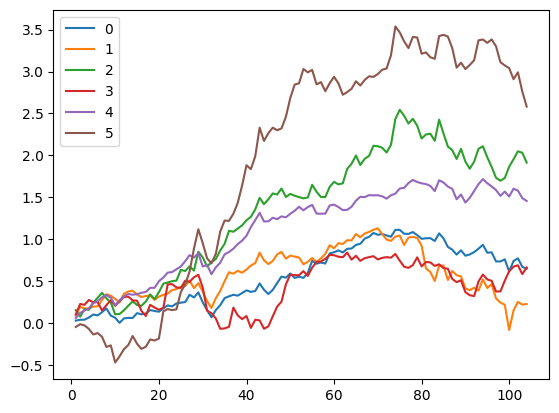

In [56]:
from data.yahoo import yahoo

# Set the start and end date
start_date = '2019-01-01'
end_date = '2023-01-01'
 
# Set the ticker
tickers = ['GOOGL','META','NVDA', 'GE', 'AAPL','TSLA']
interval = '2W'
y = yahoo(tickers)
y.pull_data(start_date, end_date)

df_bandits = y.pct_change(interval)
df_bandits.cumsum().plot()

In [57]:
pd.set_option('display.max_rows', None)

In [58]:
from experts.ucb import ucb
from exploration.explore import explore
from exploration.outils import stats

import numba as nb

In [59]:
arguments = {"exploration_rate": 0.05,
             "n_bandit":df_bandits.shape[1],
             "steps":df_bandits.shape[0],
             "c":2,
             "df_bandits":df_bandits
            }

lines = []
 
C = np.arange(0.05,2,0.05)
EXPL = np.arange(0.05,0.8,0.05)

def grid_search(C, EXPL, arguments):
    
    for c in C:
        arguments['c'] = c
        
        for expl in EXPL:
            arguments['exploration_rate'] = expl
            exp = explore(ucb.execute)
            exp.execute(100, **arguments)
            mean, std = stats(exp.rets_compo)
            line = [c, expl, mean, std]
            lines.append(line)
    
    return lines

In [60]:
lines = grid_search(C,EXPL, arguments)

In [61]:
df_expl = pd.DataFrame(lines)
df_expl.columns = ['c','exploration','mean','std']
#df_expl = df_expl[df_expl['exploration']>0].reset_index()
df_expl.sort_values(by='mean')

,c,exploration,mean,std
345,1.20,0.05,1.256571,1.222721
315,1.10,0.05,1.307231,1.244492
525,1.80,0.05,1.478131,1.152695
412,1.40,0.40,1.479159,1.700986
224,0.75,0.75,1.481893,1.710426
262,0.90,0.40,1.484768,1.585205
374,1.25,0.75,1.487479,1.852986
516,1.75,0.35,1.494933,1.875865
473,1.60,0.45,1.502739,1.236417
178,0.60,0.70,1.516978,1.876235


In [62]:
import plotly.express as px
df = px.data.iris()

fig = px.density_heatmap(df_expl, x="c", y="exploration", z="mean",
                         histfunc="avg", nbinsx = len(np.arange(0.05,2,0.05)),
                         nbinsy = len(np.arange(0.05,0.8,0.05))
                        )
fig.show()

In [63]:
fig.write_html("/home/mora/Documents/projects/bandits/notebooks/Basket_1/stocks_1_ucb.html")

In [64]:
exp = explore(ucb.execute)

In [65]:
arguments = {"exploration_rate": 0.05,
             "n_bandit":df_bandits.shape[1],
             "steps":df_bandits.shape[0],
             "c":0.3,
             "df_bandits":df_bandits
            }

exp.execute(10, **arguments)

In [66]:
mean, std = stats(exp.rets_compo)

In [67]:
mean

3.88001491384867